In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape


(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
classes=["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

TypeError: only integer scalar arrays can be converted to a scalar index

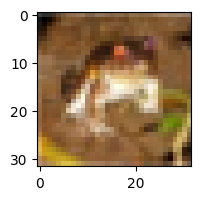

In [ ]:
plot_sample(X_train, y_train, 0)


TypeError: only integer scalar arrays can be converted to a scalar index

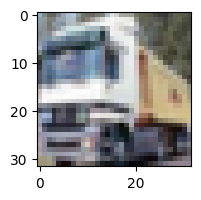

In [ ]:
plot_sample(X_train, y_train, 1)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 133ms/step - accuracy: 0.3092 - loss: 1.9244
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 112ms/step - accuracy: 0.4164 - loss: 1.6506
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.4555 - loss: 1.5543
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 90ms/step - accuracy: 0.4796 - loss: 1.4826
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.4962 - loss: 1.4375


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.57      0.55      1000
           1       0.63      0.60      0.61      1000
           2       0.41      0.26      0.32      1000
           3       0.29      0.26      0.27      1000
           4       0.49      0.29      0.37      1000
           5       0.24      0.66      0.35      1000
           6       0.47      0.62      0.54      1000
           7       0.66      0.37      0.48      1000
           8       0.79      0.35      0.49      1000
           9       0.62      0.46      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3678 - loss: 1.7340
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.5852 - loss: 1.1877
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.6439 - loss: 1.0210
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6758 - loss: 0.9315
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7068 - loss: 0.8464
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7253 - loss: 0.7902
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7418 - loss: 0.7444
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7527 - loss: 0.7095
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.7687 - loss: 0.6657
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7743 - loss: 0.6369


In [ ]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7129 - loss: 0.8486


[0.8642330169677734, 0.7093999981880188]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


array([[2.9128622e-03, 6.7693167e-05, 1.2386862e-02, 9.3367332e-01,
        4.1456340e-04, 2.6105395e-02, 1.8348124e-02, 1.0220126e-04,
        5.5420357e-03, 4.4700256e-04],
       [1.8951556e-01, 2.5259453e-01, 4.3183936e-05, 6.1972218e-04,
        2.6744639e-04, 3.2135649e-05, 1.9822389e-06, 9.4757270e-06,
        5.5245745e-01, 4.4585601e-03],
       [1.7779607e-02, 1.1942363e-02, 7.8728358e-04, 1.9541034e-03,
        1.0538792e-03, 4.9314194e-04, 2.3458152e-04, 2.0775637e-03,
        8.7994343e-01, 8.3734088e-02],
       [9.4565660e-01, 1.3961144e-03, 1.4110984e-02, 1.4123174e-04,
        7.8974403e-03, 2.8718976e-05, 5.1530889e-05, 6.7180151e-04,
        2.9926388e-02, 1.1916111e-04],
       [2.5791876e-06, 4.7172147e-05, 3.8341194e-02, 5.5312347e-03,
        1.4510575e-01, 6.3228351e-04, 8.1031841e-01, 4.5149013e-06,
        1.6505659e-05, 4.1754117e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]


array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

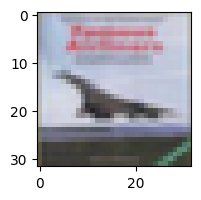

In [ ]:
plot_sample(X_test, y_test,3)


In [ ]:
classes[y_classes[3]]


'airplane'

In [ ]:
classes[y_classes[3]]


'airplane'